<a href="https://colab.research.google.com/github/nayonsoso/Pytorch/blob/main/fashion_mnist_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data load

fashion mnist는 28*28 픽셀로 이루어진 흑백 이미지이다. 

10개의 class로 나눠져 있으며 각 번호에 대한 정보는 다음과 같다.

- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot

fashion mnist 데이터는 `from keras.datasets import fashion_mnist` 으로도 로드할 수 있지만, 

본 실습에서는 캐글에서 다운 받은 파일을 직접 로드하였다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/21 동계 학부연구생/kaggle-fashion_mnist/fashion-mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/21 동계 학부연구생/kaggle-fashion_mnist/fashion-mnist_test.csv')

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


# Data Preprocessing

1) 라벨과 픽셀 데이터를 분리해줄 필요가 있다. 

- iloc를 사용 하여 전체 행에 대해 **0번 열은 y, 나머지 열은 x**로 분류한다.

2) data frame로는 신경망에 입력할 수 없으므로 데이터 형태를 바꿔준다.

- 픽셀 데이터는 **np.array()를 이용해 벡터로** 바꾼다.
- 신경망에 이미지 형태로 입력하기 위해 **(28,28) 형태로 reshape**한다.
- 라벨은 **to_categorical()으로 원-핫 인코딩**한다.

3) 픽셀 데이터를 정규화한다.
- 0 ~ 254 의 값을 갖는 픽셀 데이터를 0 ~ 1 사이의  값을 갖도록 255로 나눈다.

In [ ]:
from tensorflow.keras.utils import to_categorical
import numpy as np

def data_prep(raw):
    out_y = to_categorical(np.array(raw.iloc[:, 0])) # 라벨 원-핫 인코딩

    x_as_array = np.array(raw.iloc[:, 1:]) # 픽셀 데이터 분류
    num_images = raw.shape[0]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28) # 28*28 이미지로 reshape

    out_x = x_shaped_array / 255 # 정규화
    return out_x, out_y

x_train, y_train = data_prep(train)

In [ ]:
x_test, y_test = data_prep(test)

<Figure size 432x288 with 0 Axes>

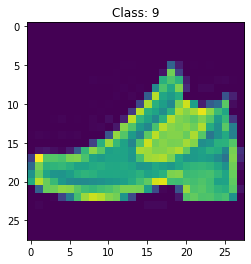

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1])
plt.title('Class: {}'.format(np.argmax(y_train[1])))
plt.figure()

In [ ]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

픽셀 데이터가 잘 이미지화 되었으며, 라벨도 잘 인코딩 되었음을 확인할 수 있다.

# solution1 - DNN With Keras

Dense 층으로만 구성된 모델 사용

참고 : https://github.com/Tec4Tric/Clothing_Image_Classification/blob/master/Using_ANN.py


In [ ]:
# Importing Packages
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Defining the Model
model = Sequential()
model.add(Flatten(input_shape=((28,28))))
model.add(Dense(200, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
# Compiling the Model
model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                                 
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting the Model
history = model.fit(x_train, y_train, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4906 - accuracy: 0.8264
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3701 - accuracy: 0.8664
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3339 - accuracy: 0.8783
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3113 - accuracy: 0.8863
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2934 - accuracy: 0.8911
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2770 - accuracy: 0.8972
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2648 - accuracy: 0.9020
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2531 - accuracy: 0.9059
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2427 - accuracy: 0.9086
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2

In [ ]:
# Evaluating on the Test Data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.33452051877975464
Test accuracy: 0.8934999704360962


# solution2 - CNN With Keras

참고 : https://www.kaggle.com/bugraokcu/cnn-with-keras

케라스에서 제공하는 Conv2D, MaxPooling2D, Dropout, Flatten, Dense 함수를 사용해 CNN으로 분류한다.

또한, 앞의 solution과 달리 model.fit 함수에 batch, validation data라는 옵션을 주어 더 정교하게 학습할 수 있게 한다.

In [ ]:
# Importing Packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

In [ ]:
# Hyper Parameter
batch_size = 256
num_classes = 10
epochs = 50
input_shape = (28, 28, 1)

# Defining the Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                kernel_initializer='he_normal',
                input_shape= input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

1) Conv2D : 합성곱 층

첫번째 인자로 커널의 수를, 두번째 인자로 커널의 사이즈를 받고 이후 padding, input_shape, activation 등을 매개변수로 받는다.

2) MaxPooling2D : 풀링 층

pool_size(풀링에 사용되는 커널의 크기), strides, padding 등을 매개변수로 받는다

3) Dropout

dropout_rate(드랍할 확률)을 매개변수로 받는다.

4) Dense

입력과 출력을 fully connected 시키는 계층. 출력 뉴련과 입력 뉴런의 수, 활성화 함수를 매개변수로 받는다.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)         

In [ ]:
# Compiling the Model
model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
# Validation Data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=13)

In [ ]:
X_train.shape

(48000, 28, 28)

In [ ]:
X_val.shape

(12000, 28, 28)

In [ ]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0, # 0 : hide accuracy, 1 : show accuracy per epoch
          validation_data=(X_val, y_val))

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1968483328819275
Test accuracy: 0.9289000034332275


에폭이 증가함에 따라 loss는 줄어들고 accuracy는 증가하는지 그래프로 검증해보자.

케라스에서 모델을 학습시킬 때 사용하는 fit 함수는 히스토리 객체를 반환한다.

히스토리 객체는 아래의 정보를 담고 있다.

- 매 에폭 마다의 훈련 손실값 (loss)
- 매 에폭 마다의 훈련 정확도 (acc)
- 매 에폭 마다의 검증 손실값 (val_loss)
- 매 에폭 마다의 검증 정확도 (val_acc)

수치들은 각 에폭마다 값이 추가되어 배열 형태로 저장되어 있다.

이러한 수치들을 그래프로 표시하여 비교하면 학습 상태를 직관적으로 이해하기 쉽다.

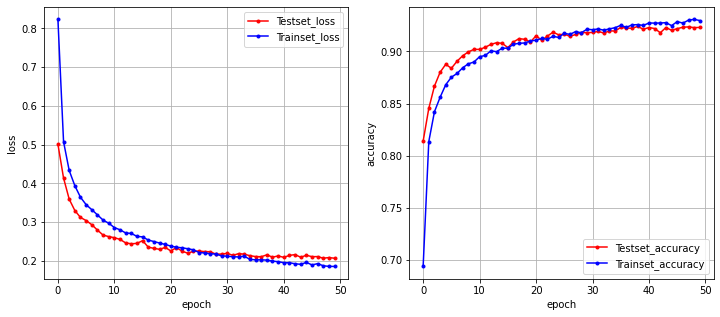

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# 검증 오차
y_vloss = history.history['val_loss']

# 훈련 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
ax1.plot(x_len, y_vloss, marker = '.', c="red", label='Testset_loss')
ax1.plot(x_len, y_loss, marker = '.', c='blue', label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
ax1.legend(loc='upper right')
ax1.grid()
ax1.set(xlabel='epoch', ylabel='loss')


# 검증 정확도
y_vaccuracy = history.history['val_accuracy']

# 검증 정확도
y_accuracy = history.history['accuracy']

# 그래프로 표현
x_len = np.arange(len(y_accuracy))
ax2.plot(x_len, y_vaccuracy, marker = '.', c="red", label='Testset_accuracy')
ax2.plot(x_len, y_accuracy, marker = '.', c='blue', label = 'Trainset_accuracy')

# 그래프에 그리드를 주고 레이블을 표시
ax2.legend(loc='lower right')
ax2.grid()

ax2.set(xlabel='epoch', ylabel='accuracy')

# draw gridlines
ax2.grid(True)
plt.show()

# solution3 - CNN whith Pytorch

In [ ]:
# Importing Packages
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch

## Data Load

케라스를 통한 실습에서는 csv 데이터를 (-1,28,28,1) 형태로 만들어 (28,28,1) 이미지를 모델에 입력하였다.

하지만 파이토치에서는 일반적으로 데이터를 **데이터 세트, 데이터 로더**를 통해 다루므로

본 실습에서는 데이터 세트와 데이터 로더를 이용해 모델에 데이터를 전달해보고자 한다.

참고 : https://sjkoding.tistory.com/10

### 1. csv 파일 로드

In [ ]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/21 동계 학부연구생/kaggle-fashion_mnist/fashion-mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/21 동계 학부연구생/kaggle-fashion_mnist/fashion-mnist_test.csv')

### 2. 파이토치에서 제공하는 데이터셋 이용

In [ ]:
# transform = transforms.Compose(transforms.ToTensor())

# trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
# testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)

## Data Preprocess

1) 사용자 정의 Data set에서 픽셀 데이터와 라벨 데이터를 슬라이싱으로 분리하고 픽셀 데이터를 (-1,28,28,1) 로 reshape한다.

2) Data set으로 데이터를 불러올 때, transform의 ToTensor로 이미지 데이터의 범위를 [0,1] 사이로 정규화 한다.

3) 배치 사이즈, 셔플 옵션과 함께 Data loader에 Data set을 전달하여 모델이 효과적으로 학습하게 한다.

ToTensor가 [0,1] 범위로 데이터를 변환하지 않는 오류 해결 : https://discuss.pytorch.org/t/does-pytorch-automatically-normalizes-image-to-0-1/40022/3

In [ ]:
class Dataset(Dataset):
    def __init__(self, data, transform = None):
        self.fashion_mnist = list(data.values)
        self.transform = transform
        label, img = [], []

        for one_line in self.fashion_mnist:
            label.append(one_line[0])
            img.append(one_line[1:])

        self.label = np.array(label)
        self.img = np.array(img).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, CHANNEL).astype('uint8')

    def __len__(self):
        return len(self.label)

    def __getitem__(self, idx):
        label, img = self.label[idx], self.img[idx]
        if self.transform:
            img = self.transform(img)
        
        return label, img

In [ ]:
BATCH_SIZE = 25
LR = 5e-3
NUM_CLASS = 10
IMAGE_SIZE = 28
CHANNEL = 1
Train_epoch = 30

In [ ]:
My_transform = transforms.Compose([
    transforms.ToTensor() # default : range [0, 255] -> [0.0, 1.0]
])

Train_data = Dataset(train, transform=My_transform)
Test_data = Dataset(test, transform=My_transform)

Train_dataloader = DataLoader(dataset=Train_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True)

Test_dataloader = DataLoader(dataset=Test_data,
                             batch_size = 1,
                             shuffle=False)

In [ ]:
Train_data.img.shape

(60000, 28, 28, 1)

In [ ]:
Train_data.label.shape

(60000,)

=> 원하는 형태가 나왔음을 확인할 수 있다.

## Modelling

nn.Module을 상속받는 사용자 모델을 정의하자.

총 3개의 합성곱 계층과 fc층으로 구성된 모델이다.

- Conv2d : 입력 체널, 출력 체널, 커널 사이즈 등을 매개변수로 받는다.

- BatchNorm2d : 활성함수의 출력값을 정규화 하는 작업을 한다. 입력 체널 수를 매개변수로 받는다.

- ReLU : 비선형성을 위한 활성화 함수이다.

- MaxPool2d : max pooling으로 이미지의 사이즈를 줄인다

참고 : https://gaussian37.github.io/dl-pytorch-conv2d/

https://wjddyd66.github.io/pytorch/Pytorch-Problem/

In [ ]:
# Defining the Model
class My_model(nn.Module):
    def __init__(self, num_of_class):
        super(My_model, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1), # 28 * 28 * 16
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)) # 14 * 14 * 16
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1), # 14 * 14 * 32
            nn.BatchNorm2d(32),
            nn.ReLU()
            # nn.MaxPool2d(kernel_size=2, stride=2) # 7 * 7 * 32
            ) # 14 * 14 * 32

        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )  # 7 * 7 * 64
        
        self.fc = nn.Linear(7 * 7 * 64, num_of_class)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

위에서 정의된 모델을 통해 학습을 진행하자.

가장 성능이 좋은 모델을 구하기 위해 min_Loss를 갱신하며 가장 작은 loss 를 갖는 model을 저장한다.

In [ ]:
def train():
    # 모델 선언
    model = My_model(NUM_CLASS)
    # 옵티마이저 선언
    optimizer = torch.optim.Adam(model.parameters(), lr = LR)
    # 손실함수 선언
    criterion = nn.CrossEntropyLoss()
    min_Loss = 100000

    for epoch in range(1, Train_epoch + 1):
        for batch_id, (label, image) in enumerate(Train_dataloader):
            # 모델에 데이터 넣기
            output = model(image)
            # 로스 구하기
            loss = criterion(output, label)

            # 옵티마이저 기울기 0으로 맞추기
            optimizer.zero_grad()
            # 역전파 진행
            loss.backward()
            # 최적화
            optimizer.step()

            if batch_id % 1000 == 0:
                print('Loss :{:.4f} Epoch[{}/{}]'.format(loss.item(), epoch, Train_epoch))
                # loss가 가장 적은 모델 저장
                if loss.item() < min_Loss:
                    torch.save(model, '/content/drive/MyDrive/Colab Notebooks/21 동계 학부연구생/kaggle-fashion_mnist/best_model.pt')
                    min_Loss = loss.item() # min_Loss 갱신
                    print('Model save!! found minimum loss :', min_Loss)
    return model

위에서 찾은 best model과 test데이터로더를 이용해 모델을 평가해보자.

In [ ]:
model = train()

Loss :2.3055 Epoch[1/30]
Model save!! found minimum loss : 2.305450677871704
Loss :0.0924 Epoch[1/30]
Model save!! found minimum loss : 0.09236554056406021
Loss :0.3076 Epoch[1/30]
Loss :0.1859 Epoch[2/30]
Loss :0.3562 Epoch[2/30]
Loss :0.1456 Epoch[2/30]
Loss :0.1209 Epoch[3/30]
Loss :0.1449 Epoch[3/30]
Loss :0.2557 Epoch[3/30]
Loss :0.1098 Epoch[4/30]
Loss :0.0904 Epoch[4/30]
Model save!! found minimum loss : 0.09036216884851456
Loss :0.3099 Epoch[4/30]
Loss :0.0674 Epoch[5/30]
Model save!! found minimum loss : 0.06742525100708008
Loss :0.1633 Epoch[5/30]
Loss :0.2069 Epoch[5/30]
Loss :0.0849 Epoch[6/30]
Loss :0.1644 Epoch[6/30]
Loss :0.2255 Epoch[6/30]
Loss :0.1410 Epoch[7/30]
Loss :0.0457 Epoch[7/30]
Model save!! found minimum loss : 0.04574984684586525
Loss :0.1767 Epoch[7/30]
Loss :0.2383 Epoch[8/30]
Loss :0.1713 Epoch[8/30]
Loss :0.2183 Epoch[8/30]
Loss :0.1146 Epoch[9/30]
Loss :0.0407 Epoch[9/30]
Model save!! found minimum loss : 0.04073558747768402
Loss :0.1972 Epoch[9/30]
Los

In [ ]:
def test(model):
    model = torch.load('/content/drive/MyDrive/Colab Notebooks/21 동계 학부연구생/kaggle-fashion_mnist/best_model.pt') # 모델 불러오기
    print('success load best_model')
    pred = []
    with torch.no_grad():
        correct = 0
        total = 0
        for label, image in Test_dataloader:
            outputs = model(image)

            predicted = np.array(torch.argmax(outputs, dim=1))
            pred.append(predicted)
    
    print(np.array(pred).flatten().shape)
    return np.array(pred).flatten()

In [ ]:
pred = test(model)

success load best_model
(10000,)


In [ ]:
pred[:10]

array([0, 1, 2, 6, 3, 6, 8, 2, 5, 0])

In [ ]:
Test_data.label[:10]

array([0, 1, 2, 2, 3, 2, 8, 6, 5, 0])

In [ ]:
correct = pred == Test_data.label
accuracy = correct.sum().item() / len(pred)
print(accuracy)

0.8836


### Sunbmission

가장 accuracy가 높은 solution2를 이용해 제출 파일을 만들어보자

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/21 동계 학부연구생/kaggle-fashion_mnist/sample_submission.csv')

In [ ]:
submission['label'] = pred

In [ ]:
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/21 동계 학부연구생/kaggle-fashion_mnist/submission.csv', index=False)